<h1><center> Feature Engineering - Part 1 </center></h1>

## To-Do: (Week 2)

(a) Consolidate categories based on the % of Yes/No (0-25% as Level 1, 25-50% as Level 2, 50-75% as Level 3 and 75-100% as Level 4)

(b) 1-0 Encoding or Creating dummy variables (https://www.youtube.com/watch?v=0s_1IsROgDc)

(c) Binning the age -> Plot histogram of age ....bin according to job category (Note: bin hosuld of the same magnitude)

In [1]:
%matplotlib notebook
#Jupyter Notebook with Matplotlib Inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.model_selection import train_test_split

Data already split into Train and Test and dropped unnecessary columns in the previous week code

In [7]:
#read the cleaned datasets
train = pd.read_csv("train.csv", delimiter=',') 
test = pd.read_csv("test.csv", delimiter=',')

In [11]:
train.count()

age             32950
job             32950
marital         32950
education       32950
default         32950
housing         32950
personal        32950
contact_type    32950
month           32950
day             32950
duration        32950
dcontacts       32950
pdays           32950
pcontacts       32950
poutcome        32950
evr             32950
cpi             32950
cci             32950
euribor         32950
employees       32950
y               32950
dtype: int64

In [4]:
train.head()

,age,job,marital,education,default,housing,personal,contact_type,month,day,...,dcontacts,pdays,pcontacts,poutcome,evr,cpi,cci,euribor,employees,y
0,41,admin.,single,professional.course,no,yes,yes,cellular,apr,fri,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
1,55,management,married,basic.9y,no,yes,no,cellular,jul,wed,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
2,55,admin.,married,high.school,no,yes,no,cellular,apr,wed,...,3,999,1,failure,-1.8,93.075,-47.1,1.415,5099.1,no
3,36,admin.,divorced,university.degree,no,no,yes,cellular,nov,thu,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no
4,32,entrepreneur,single,university.degree,no,yes,no,telephone,may,tue,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
test.head()

,age,job,marital,education,default,housing,personal,contact_type,month,day,...,dcontacts,pdays,pcontacts,poutcome,evr,cpi,cci,euribor,employees,y
0,36,blue-collar,married,basic.9y,no,unknown,unknown,telephone,jun,tue,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
1,60,admin.,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,45,blue-collar,married,basic.4y,no,no,no,cellular,may,tue,...,1,999,1,failure,-1.8,92.893,-46.2,1.291,5099.1,no
3,27,admin.,married,high.school,no,no,no,cellular,may,thu,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,no
4,38,admin.,married,university.degree,no,no,no,cellular,aug,thu,...,11,999,0,nonexistent,1.4,93.444,-36.1,4.962,5228.1,no


In [5]:
train['y'].value_counts()

no     29208
yes     3742
Name: y, dtype: int64

The dataset seems pretty unbalanced (89% to 11%) but given the problem at hand, this is quite balanced

In [6]:
train.astype('object').describe().transpose()

,count,unique,top,freq
age,32950,78,31,1579
job,32950,12,admin.,8356
marital,32950,4,married,19984
education,32950,8,university.degree,9716
default,32950,3,no,26047
housing,32950,3,yes,17271
personal,32950,3,no,27154
contact_type,32950,2,cellular,20899
month,32950,10,may,11027
day,32950,5,thu,6881


<h2> <u> Feature Engineering on Categorical Variables 

<h3> Analyzing 'job', 'education' and 'month' variables with respect to percentages 

In [18]:
pd.crosstab(train.job, train.y, normalize='index')

y,no,yes
job,,
admin.,0.872427,0.127573
blue-collar,0.931175,0.068825
entrepreneur,0.914787,0.085213
housemaid,0.892771,0.107229
management,0.885897,0.114103
retired,0.743126,0.256874
self-employed,0.891115,0.108885
services,0.918064,0.081936
student,0.679558,0.320442


In [20]:
pd.crosstab(train.education, train.y, normalize='index')

y,no,yes
education,,
basic.4y,0.893093,0.106907
basic.6y,0.921212,0.078788
basic.9y,0.923236,0.076764
high.school,0.888016,0.111984
illiterate,0.750000,0.250000
professional.course,0.881497,0.118503
university.degree,0.864142,0.135858
unknown,0.860200,0.139800


In [21]:
pd.crosstab(train.month, train.y, normalize='index')

y,no,yes
month,,
apr,0.797060,0.202940
aug,0.893210,0.106790
dec,0.520833,0.479167
jul,0.907042,0.092958
jun,0.892740,0.107260
mar,0.491841,0.508159
may,0.934252,0.065748
nov,0.901816,0.098184
oct,0.565292,0.434708


<h3> Analyzing 'job', 'education' and 'month' variables with respect to counts

In [23]:
pd.crosstab(train.job, train.y)

y,no,yes
job,,
admin.,7290,1066
blue-collar,6846,506
entrepreneur,1095,102
housemaid,741,89
management,2073,267
retired,1027,355
self-employed,1023,125
services,2902,259
student,492,232


In [26]:
pd.crosstab(train.education, train.y)

y,no,yes
education,,
basic.4y,2974,356
basic.6y,1672,143
basic.9y,4474,372
high.school,6780,855
illiterate,9,3
professional.course,3697,497
university.degree,8396,1320
unknown,1206,196


In [27]:
pd.crosstab(train.month, train.y)

y,no,yes
month,,
apr,1681,428
aug,4433,530
dec,75,69
jul,5191,532
jun,3812,458
mar,211,218
may,10302,725
nov,2930,319
oct,329,253


### (a) Consolidate category classes into various levels based on the percentages and counts (0-25% as Level 1, 25-50% as Level 2, 50-75% as Level 3 and 75-100% as Level 4)

In [28]:
#Creating seperate dataframes for each categorical merge

# Percentages
trn_j1 = train.copy() # 'job' level
trn_e1 = train.copy() # 'education' variable  
trn_m1 = train.copy() # # 'month' variable


# 'education' variable  
trn_j2 = train.copy() # Total Counts
trn_e2 = train.copy() # 'education' variable  
trn_m2 = train.copy() # Total Counts


# Total Positive Counts
trn_m3 = train.copy() # Total Positive Counts
trn_e3 = train.copy() # 'education' variable  
trn_j3 = train.copy() # Total Positive Counts


In [29]:
# Consolidating multiple category classes into different levels based on 'PERCENTAGES'

trn_j1['job'].replace(['blue-collar', 'services', 'entrepreneur', 'housemaid', 'self-employed', 'technician', 'management', 
                       'unknown', 'admin.', 'unemployed', 'retired', 'student'],
                      ['j1l4', 'j1l4', 'j1l4', 'j1l3', 'j1l3', 'j1l3', 'j1l3', 'j1l2', 'j1l2', 'j1l2', 'j1l1', 'j1l1'], 
                      inplace=True)

trn_e1['education'].replace(['basic.9y','basic.6y','basic.4y','high.school','professional.course','university.degree','unknown','illiterate'],
                      ['e1l4','e1l4','e1l3','e1l3','e1l3','e1l2','e1l2','e1l1'], 
                      inplace=True)

trn_m1['month'].replace(['may','jul','nov','aug','jun','apr','oct','sep','dec','mar'],
                      ['m1l3','m1l3','m1l3','m1l3','m1l3','m1l2','m1l1','m1l1','m1l1','m1l1'], 
                      inplace=True)

In [50]:
pd.crosstab(trn_j1['job'],trn_j1['y'], normalize='index')

y,no,yes
job,,
j1l1,0.721273,0.278727
j1l2,0.871108,0.128892
j1l3,0.889496,0.110504
j1l4,0.925961,0.074039


In [51]:
pd.crosstab(trn_e1['education'],trn_j1['y'], normalize='index')

y,no,yes
education,,
e1l1,0.750000,0.250000
e1l2,0.863645,0.136355
e1l3,0.887328,0.112672
e1l4,0.922684,0.077316


In [59]:
# ......IMPORTANT...... Consider this crosstab results for analysis than the next result.
# count of illiterate = 9 and 3. Hence crosstabbed without normalization
pd.crosstab(trn_m1['month'],trn_m1['y'])

y,no,yes
month,,
m1l1,859,750
m1l2,1681,428
m1l3,26668,2564


In [52]:
pd.crosstab(trn_m1['month'],trn_j1['y'], normalize='index')

y,no,yes
month,,
m1l1,0.533872,0.466128
m1l2,0.797060,0.202940
m1l3,0.912288,0.087712


In [31]:
# Consolidating multiple category classes into different levels based on 'TOTAL COUNTS'

trn_j2['job'].replace(['unknown','student','unemployed','housemaid','self-employed','entrepreneur','retired','management',
                       'services','technician','blue-collar','admin.'],
                      ['j2l4','j2l4','j2l4','j2l4','j2l4','j2l4','j2l4','j2l3','j2l3','j2l2','j2l2','j2l1'], 
                      inplace=True)

trn_e2['education'].replace(['illiterate','unknown','basic.6y','basic.4y','professional.course','basic.9y','high.school','university.degree'],
                      ['e2l4','e2l4','e2l4','e2l4','e2l3','e2l3','e2l2','e2l1'], 
                      inplace=True)

trn_m2['month'].replace(['dec','mar','sep','oct','apr','nov','jun','aug','jul','may'],
                      ['m2l4','m2l4','m2l4','m2l4','m2l3','m2l3','m2l3','m2l2','m2l2','m2l1'], 
                      inplace=True)

In [53]:
pd.crosstab(trn_j2['job'],trn_j1['y'], normalize='index')

y,no,yes
job,,
j2l1,0.872427,0.127573
j2l2,0.913877,0.086123
j2l3,0.904381,0.095619
j2l4,0.834459,0.165541


In [54]:
pd.crosstab(trn_e2['education'],trn_j1['y'], normalize='index')

y,no,yes
education,,
e2l1,0.864142,0.135858
e2l2,0.888016,0.111984
e2l3,0.903872,0.096128
e2l4,0.893581,0.106419


In [55]:
pd.crosstab(trn_m2['month'],trn_j1['y'], normalize='index')

y,no,yes
month,,
m2l1,0.934252,0.065748
m2l2,0.900618,0.099382
m2l3,0.874844,0.125156
m2l4,0.533872,0.466128


In [33]:
# Consolidating multiple category classes into different levels based on 'TOTAL POSITIVE COUNTS'

trn_j3['job'].replace(['unknown','housemaid','entrepreneur','unemployed','self-employed','student','services','management',
                       'retired','blue-collar','technician','admin.'],
                      ['j3l4','j3l4','j3l4','j3l4','j3l4','j3l4','j3l3','j3l3','j3l3','j3l2','j3l2','j3l1'], 
                      inplace=True)

trn_e3['education'].replace(['illiterate','basic.6y','unknown','basic.4y','basic.9y','professional.course','high.school','university.degree'],
                      ['e3l3','e3l3','e3l3','e3l3','e3l3','e3l2','e3l2','e3l1'], 
                      inplace=True)

trn_m3['month'].replace(['dec','sep','mar','oct','nov','apr','jun','aug','jul','may'],
                      ['m3l4','m3l4','m3l4','m3l4','m3l4','m3l3','m3l3','m3l2','m3l2','m3l1'], 
                      inplace=True)

In [56]:
pd.crosstab(trn_j3['job'],trn_j1['y'], normalize='index')

y,no,yes
job,,
j3l1,0.872427,0.127573
j3l2,0.913877,0.086123
j3l3,0.872003,0.127997
j3l4,0.859779,0.140221


In [57]:
pd.crosstab(trn_e3['education'],trn_j1['y'], normalize='index')

y,no,yes
education,,
e3l1,0.864142,0.135858
e3l2,0.885705,0.114295
e3l3,0.906181,0.093819


In [58]:
pd.crosstab(trn_m3['month'],trn_j1['y'], normalize='index')

y,no,yes
month,,
m3l1,0.934252,0.065748
m3l2,0.900618,0.099382
m3l3,0.861107,0.138893
m3l4,0.779951,0.220049


### (b) 1-0 Encoding or Creating dummy variables (https://www.youtube.com/watch?v=0s_1IsROgDc)

In [60]:
# Percentages
trn_j1 = pd.get_dummies(trn_j1, columns=['job'])
trn_m1 = pd.get_dummies(trn_m1, columns=['month'])
trn_e1 = pd.get_dummies(trn_e1, columns=['education'])

# Total Counts
trn_j2 = pd.get_dummies(trn_j2, columns=['job'])
trn_m2 = pd.get_dummies(trn_m2, columns=['month'])
trn_e2 = pd.get_dummies(trn_e2, columns=['education'])

# Total Positive Counts
trn_j3 = pd.get_dummies(trn_j3, columns=['job'])
trn_m3 = pd.get_dummies(trn_m3, columns=['month'])
trn_e3 = pd.get_dummies(trn_e3, columns=['education'])

In [61]:
trn_j1.head(3)
trn_j2.head(3)
trn_j3.head(3)

trn_m1.head(3)
trn_m2.head(3)
trn_m3.head(3)

trn_e1.head(3)
trn_e2.head(3)
trn_e3.head(3)

,age,job,marital,default,housing,personal,contact_type,month,day,duration,...,poutcome,evr,cpi,cci,euribor,employees,y,education_e3l1,education_e3l2,education_e3l3
0,41,admin.,single,no,yes,yes,cellular,apr,fri,41,...,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no,0,1,0
1,55,management,married,no,yes,no,cellular,jul,wed,421,...,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no,0,0,1
2,55,admin.,married,no,yes,no,cellular,apr,wed,140,...,failure,-1.8,93.075,-47.1,1.415,5099.1,no,0,1,0


### (c) Binning the age -> Plot histogram of age ....bin according to job category (Note: bin hosuld of the same magnitude)

In [ ]:
# We create 12 sub dataframes from 'job' with respect to their 'age'. This gives us deeper view of the data to find any 
# seperate interesting features that we can come up.

<IPython.core.display.Javascript object>


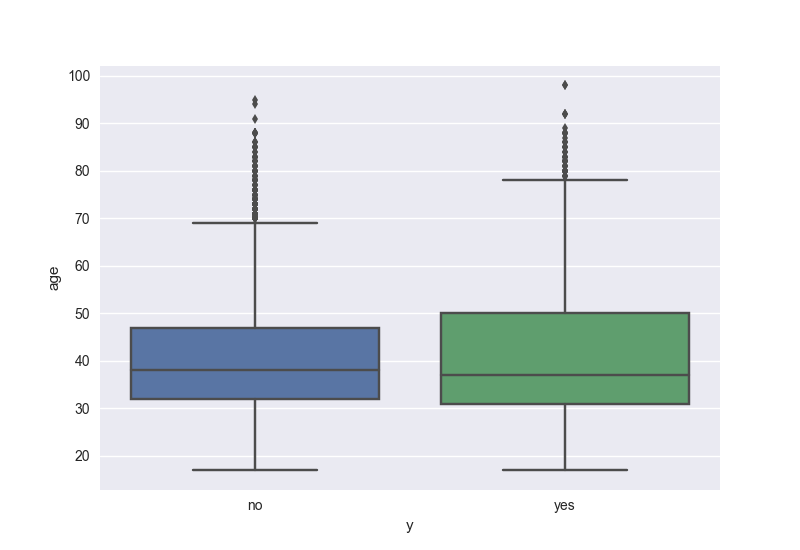

In [62]:
sns.boxplot(x="y", y = "age", data = train) 

In [63]:
# Analyzing age feature

<IPython.core.display.Javascript object>


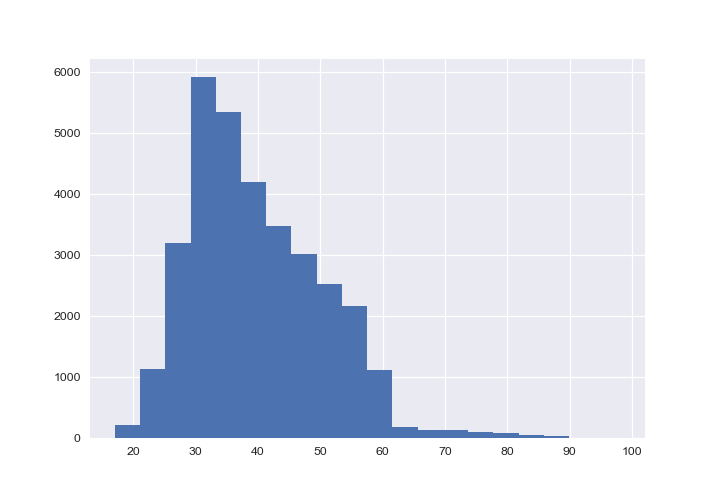

In [55]:
train['age'].hist(bins=20)

In [56]:
train['job'].value_counts()

admin.           8356
blue-collar      7352
technician       5374
services         3161
management       2340
retired          1382
entrepreneur     1197
self-employed    1148
housemaid         830
unemployed        813
student           724
unknown           273
Name: job, dtype: int64

In [68]:
pd.pivot_table(train, index='job', values='age',  aggfunc= 'mean')

,age
job,
admin.,38.212901
blue-collar,39.559032
entrepreneur,41.812030
housemaid,45.169880
management,42.478205
retired,62.071635
self-employed,40.006098
services,38.078456
student,25.965470


In [140]:
train['age'].describe()

count    32950.000000
mean        40.047162
std         10.439350
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: age, dtype: float64

In [73]:
admin = (train.loc[(train['job'] == 'admin.')])[['job','age']]                 #8356
student = (train.loc[(train['job'] == 'student')])[['job','age']]              #724
services = (train.loc[(train['job'] == 'services')])[['job','age']]            #3161
technician = (train.loc[(train['job'] == 'technician')])[['job','age']]        #5374
unemployed = (train.loc[(train['job'] == 'unemployed')])[['job','age']]        #813
blue_collar = (train.loc[(train['job'] == 'blue-collar')])[['job','age']]      #7352
self_employed = (train.loc[(train['job'] == 'self-employed')])[['job','age']]  #1148
entrepreneur = (train.loc[(train['job'] == 'entrepreneur')])[['job','age']]    #1197
management = (train.loc[(train['job'] == 'management')])[['job','age']]        #2340
housemaid = (train.loc[(train['job'] == 'housemaid')])[['job','age']]          #830
unknown = (train.loc[(train['job'] == 'unknown')])[['job','age']]              #273
retired = (train.loc[(train['job'] == 'retired')])[['job','age']]              #1382

<IPython.core.display.Javascript object>


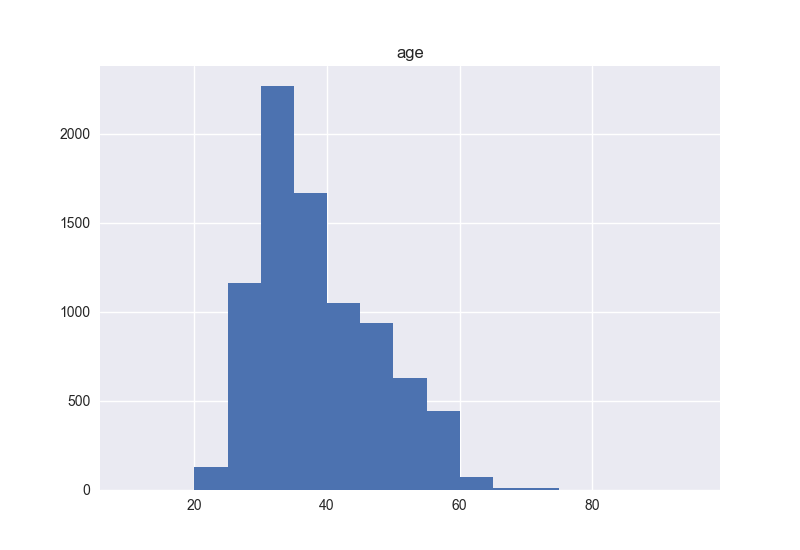

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CD82940>]], dtype=object)

In [74]:
admin.hist(bins=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95]) #8356
# Data is Skewed to the right, Around 66% of the admins are aged less than 40 and 90% of them are less than 51 years

<IPython.core.display.Javascript object>


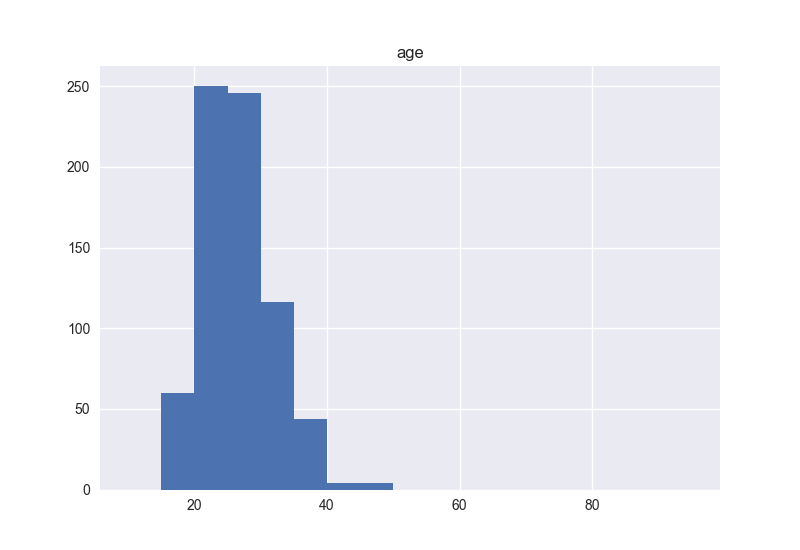

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000EDF0978>]], dtype=object)

In [78]:
student.hist(bins=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95])       #724
#Skewed to the right and 87% of the students are ages less than 32 and 78% of them are less than 28

<IPython.core.display.Javascript object>


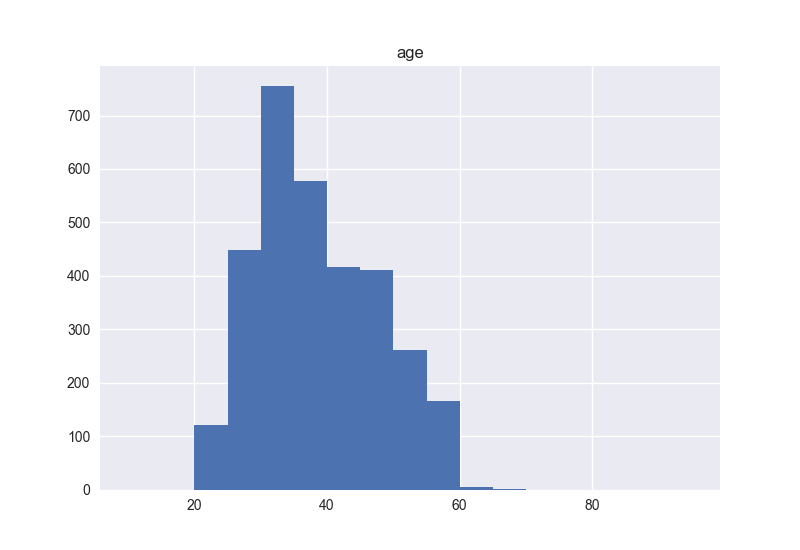

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000012E74390>]], dtype=object)

In [79]:
services.hist(bins=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95])     #316 (services)
# Skewed to the right. Around 87% of the people who are in 'services' are less than 50 years old 
# and 60 % of them are less than 40 years.

<IPython.core.display.Javascript object>


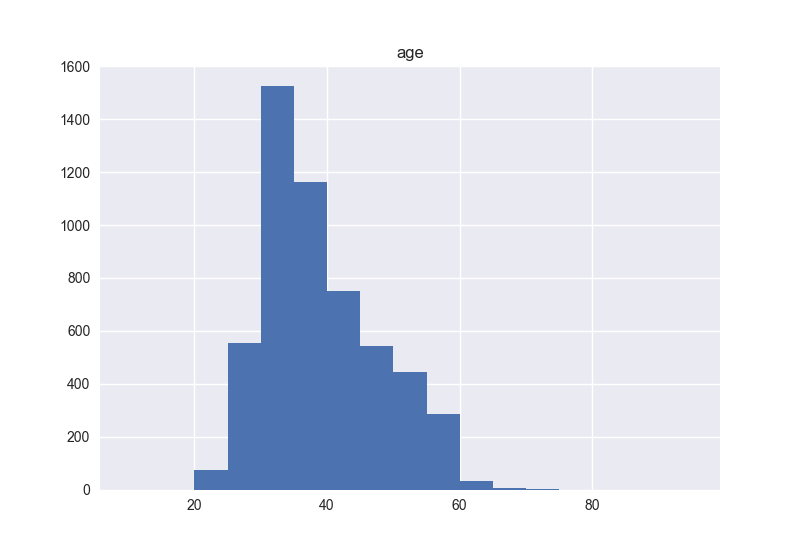

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000013626CF8>]], dtype=object)

In [81]:
technician.hist(bins=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95])   #5374 (technician)
#Skewed to the right. Largely concentrated at the center (about 50% are in 30-40) and 76% are less than 45 years

<IPython.core.display.Javascript object>


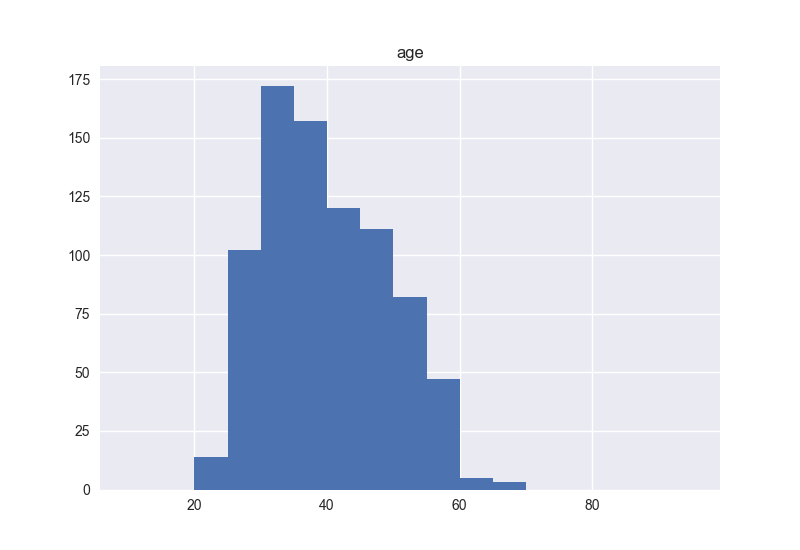

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000013B3F278>]], dtype=object)

In [82]:
unemployed.hist(bins=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95])   #813 (unemployed)
# This is a Combed distribution (Assumption)... 88% of the customers are unemployed between 25-50.

# Note:
    # Comb. In a comb distribution, the bars are alternately tall and short. 
    # This distribution often results from rounded-off data and/or an incorrectly constructed histogram. 

<IPython.core.display.Javascript object>


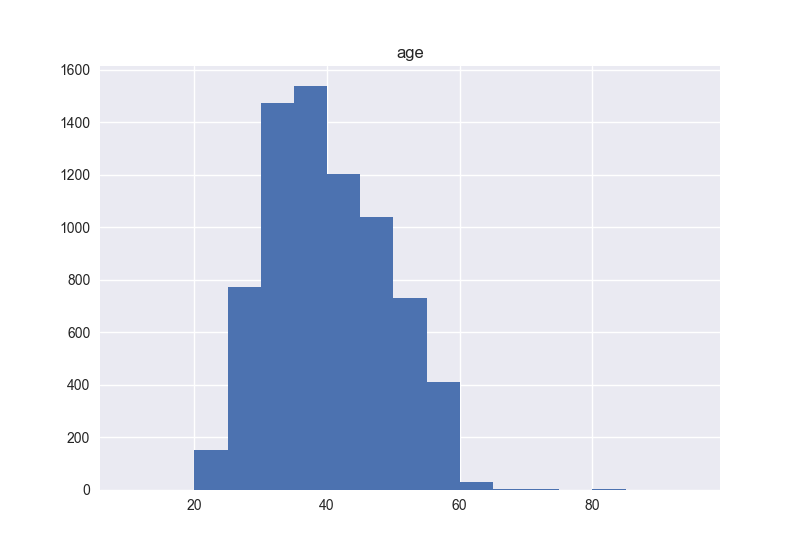

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001483B470>]], dtype=object)

In [85]:
blue_collar.hist(bins=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95])  #7352 (blue-collar)
# blue_collar.hist(bins=20)

# Slightly Skewed to the right? 
# Not uniform because data is not uniformly distributed on either sides of either mean (39.5) or median (39).
# Data is skewed to the right with 85% of the blue-collared jobs are held between the 25-50 age group. 

<IPython.core.display.Javascript object>


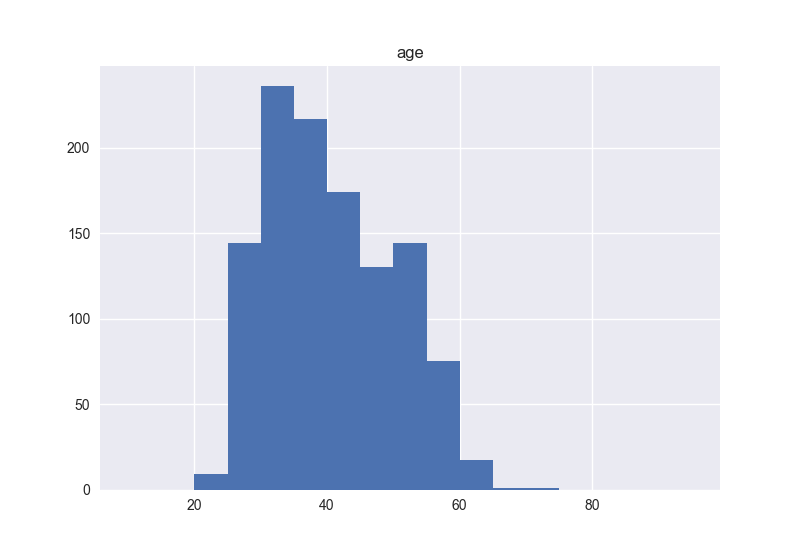

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000014C02A58>]], dtype=object)

In [86]:
self_employed.hist(bins=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95])#1148 (self-employed)
# Data skewed to the right. 70% of the self-employed persons are less than 45 years old

<IPython.core.display.Javascript object>


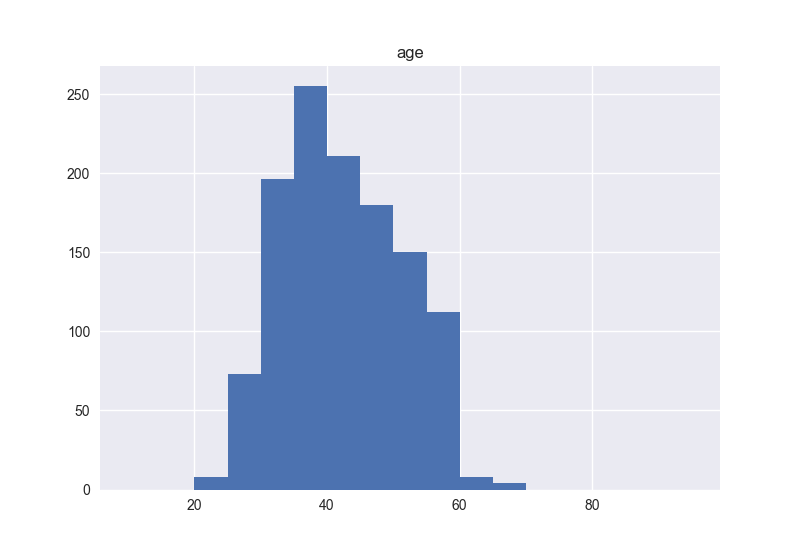

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000150FAE48>]], dtype=object)

In [87]:
entrepreneur.hist(bins=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95]) #1197 (entrepreneur)
# h.mean() #42
# h.median() #41
# Skewed to th right and 77% of the entrepreneurs are less than 50 years old

<IPython.core.display.Javascript object>


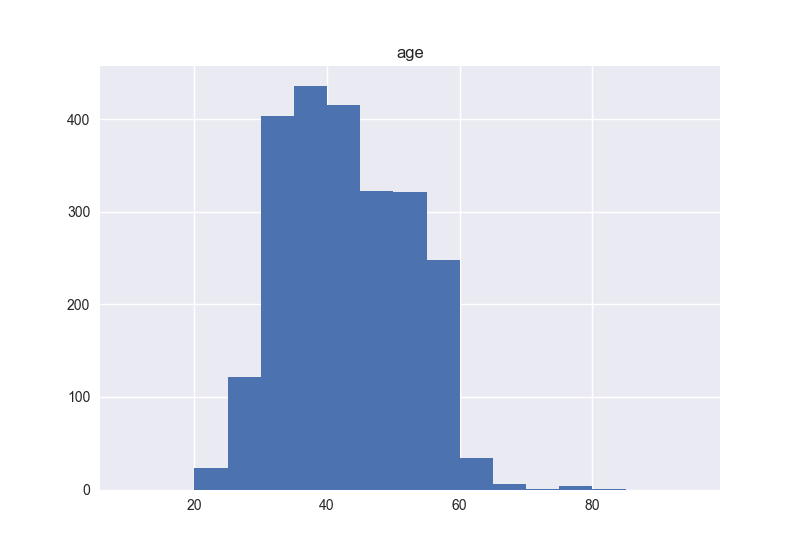

age    42.0
dtype: float64

In [88]:
management.hist(bins=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95])   #2340 (management)
# Skewed to the right and 91% of people in management are less than 55 years
management.mean() #42.5
management.median() #42

<IPython.core.display.Javascript object>


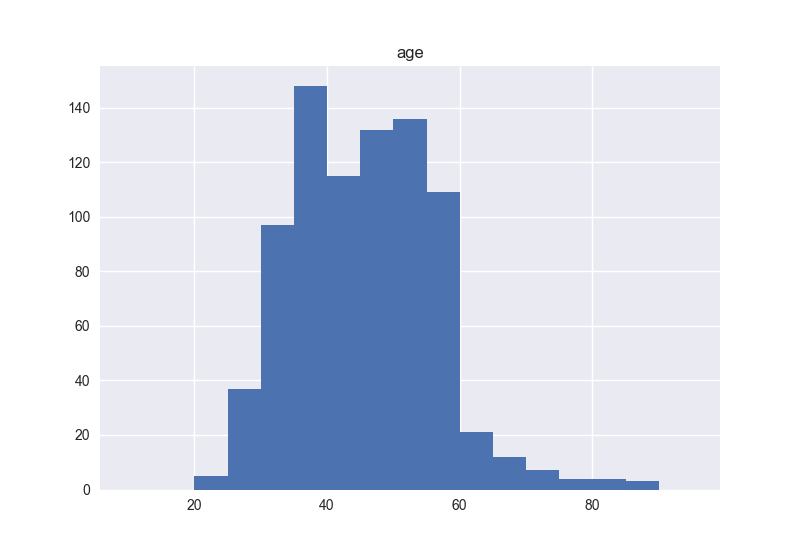

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000014BBEF28>]], dtype=object)

In [89]:
housemaid.hist(bins=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95])   #830 (housemaid)
# Skewed to the right?? (55% of the data is to the left of mean and 45% of the data is to the right). 
# 93% of the housemaids are less than 60 years 

# j.mean()#45
# j.median() #45

<IPython.core.display.Javascript object>


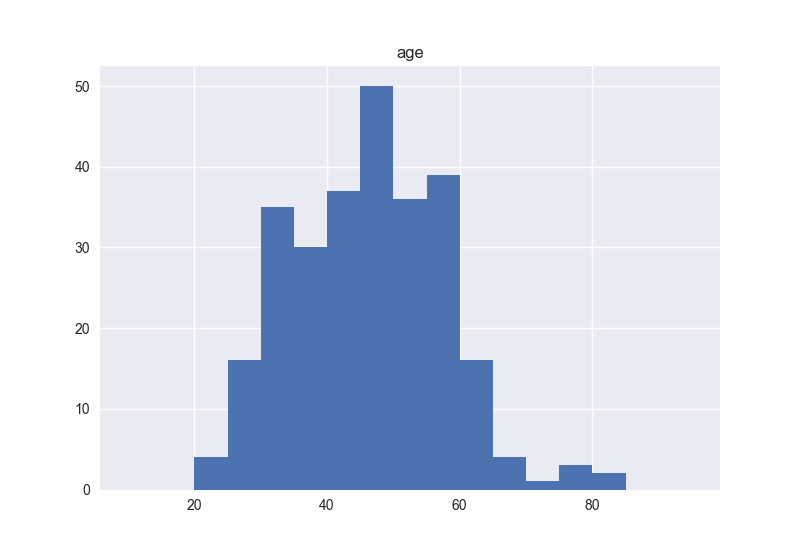

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001598C0F0>]], dtype=object)

In [90]:
unknown.hist(bins=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95])      #273 (unknown)
# 87% of the 'unknown' category jobs are between 35-60 years age group

<IPython.core.display.Javascript object>


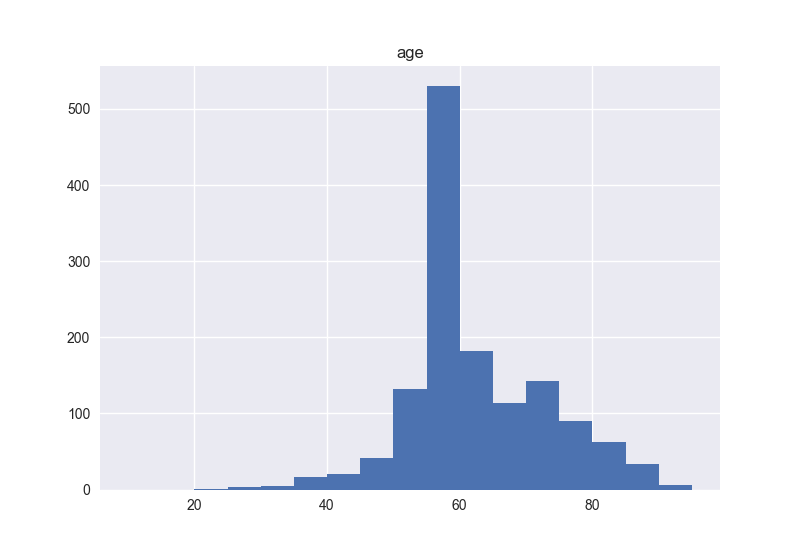

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000161F6FD0>]], dtype=object)

In [92]:
retired.hist(bins=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95])      #1382 (retired)
# WHAT DISTRIBUTION
# 80% of the retired people are between 50-65 age greoup and addition 20% from 65-75... 
# 95% of the retired people are above 50


In [ ]:
# There is rapid increase from 20-25 and 25-30 age groups but 
# Data is mostly concentrated between 30-50 year age group. (except for students)
# There is gradual decline in age groups beyond 50 (except for retired) 